<a href="https://colab.research.google.com/github/AjmiyaSalim/stroke-detection-ml/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Stroke Prediction using KNN, SVM, and Gaussian Naive Bayes

This project aims to develop and compare machine learning models for predicting the likelihood of a stroke in individuals using health-related features. The dataset includes variables such as **age**, **hypertension**, **heart disease**, **marital status**, **work type**, **residence type**, **average glucose level**, **BMI**, and **smoking status**, along with the target variable `stroke`.

We implement and evaluate three popular classification algorithms:

- **K-Nearest Neighbors (KNN)**: A distance-based algorithm that classifies a data point based on the majority class among its nearest neighbors.
- **Support Vector Machine (SVM)**: A powerful algorithm that finds the optimal hyperplane to separate different classes in the feature space.
- **Gaussian Naive Bayes (GNB)**: A probabilistic classifier based on Bayes’ theorem, assuming the features follow a Gaussian distribution.

The goal is to determine which model performs best in predicting strokes, based on performance metrics such as **accuracy**, **precision**, **recall**, and **F1-score**.


In [1]:
import pandas as pd
data=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
data.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [3]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


>  **Note:** The `id` column was removed from the dataset as it serves only as a unique identifier for each record and does not carry any predictive value. Including such non-informative features can introduce noise and reduce model performance.


In [5]:
data.drop(['id'],axis=1,inplace=True)

##  Need for Data Visualization

Before building any predictive model, it is essential to **understand the underlying structure and distribution** of the data. Visualizations provide a quick and intuitive way to:

- Detect class imbalance
- Identify trends, patterns, or anomalies
- Understand feature distributions
- Guide preprocessing and modeling decisions




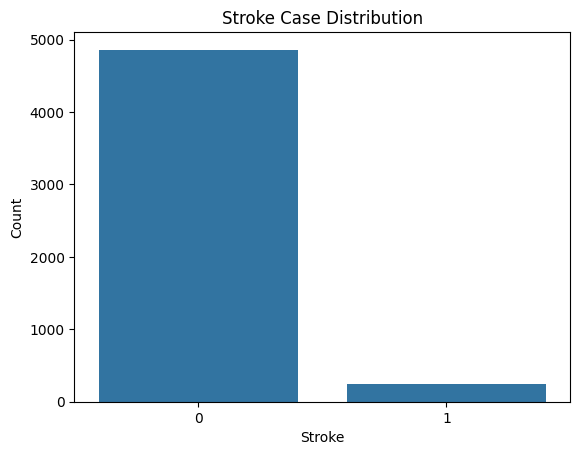

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='stroke')
plt.title('Stroke Case Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


In [6]:
data['stroke'].value_counts()

,count
stroke,
0,4861
1,249


> ⚠️ **Class Imbalance and Its Significance**  
> The target variable in this dataset is highly imbalanced, with only **5% of the samples labeled as stroke (1)** and **95% as non-stroke (0)**. While this imbalance poses challenges for traditional classifiers — often leading to biased predictions toward the majority class — it reflects real-world medical data where stroke is a rare but critical condition.  
>
> Despite the imbalance, predicting the minority class (stroke) is **highly significant**, as early detection can potentially save lives and reduce long-term complications. Therefore, special care must be taken during model development and evaluation, such as using **recall, F1-score**, and techniques like **resampling** or **class weighting**, to ensure the model remains sensitive to stroke cases.


> 🔄 **Encoding Categorical Features**  
> The categorical columns `'gender'`, `'ever_married'`, `'work_type'`, `'Residence_type'`, and `'smoking_status'` were encoded using `LabelEncoder`. This transforms string labels into numeric form so that machine learning models can process them.  
>
> ⚠️ **Note:** Label encoding assigns an arbitrary integer to each category, which may unintentionally imply ordinal relationships. For algorithms sensitive to numerical magnitude (like KNN or SVM), **One-Hot Encoding** is often preferred. However, for tree-based or Naive Bayes classifiers, label encoding is usually acceptable.


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status']:
  data[i]=le.fit_transform(data[i])

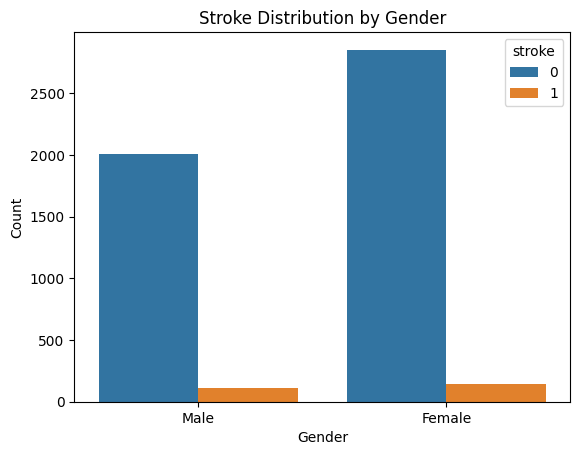

In [36]:
gender_map = {0: 'Female', 1: 'Male'}
data['gender_label'] = data['gender'].map(gender_map)

sns.countplot(data=data, x='gender_label', hue='stroke')
plt.title('Stroke Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


##  Feature Distribution for Male Stroke Patients

This visualization focuses on **male patients who experienced a stroke** (`gender == 0` and `stroke == 1`) and **female patients who experienced a stroke** (`gender == 1` and `stroke == 1`) separately.

- The dataset is first filtered to include only male stroke cases.
- Then, for each selected feature (`age`, `hypertension`, `heart_disease`, `avg_glucose_level`, `bmi`, `smoking_status`), an appropriate plot is generated:


###  Purpose:
This plots helps us understand:
- How different factors are distributed among **male stroke patients** and **female stroke patients**.
- Whether specific patterns or risk factors (like high glucose or BMI) are visibly prominent.
- Insights that may support **feature importance**, **risk profiling**, or **targeted interventions** for stroke prediction.

This type of segmented visualization is crucial in health data analysis to uncover hidden trends within specific subgroups.


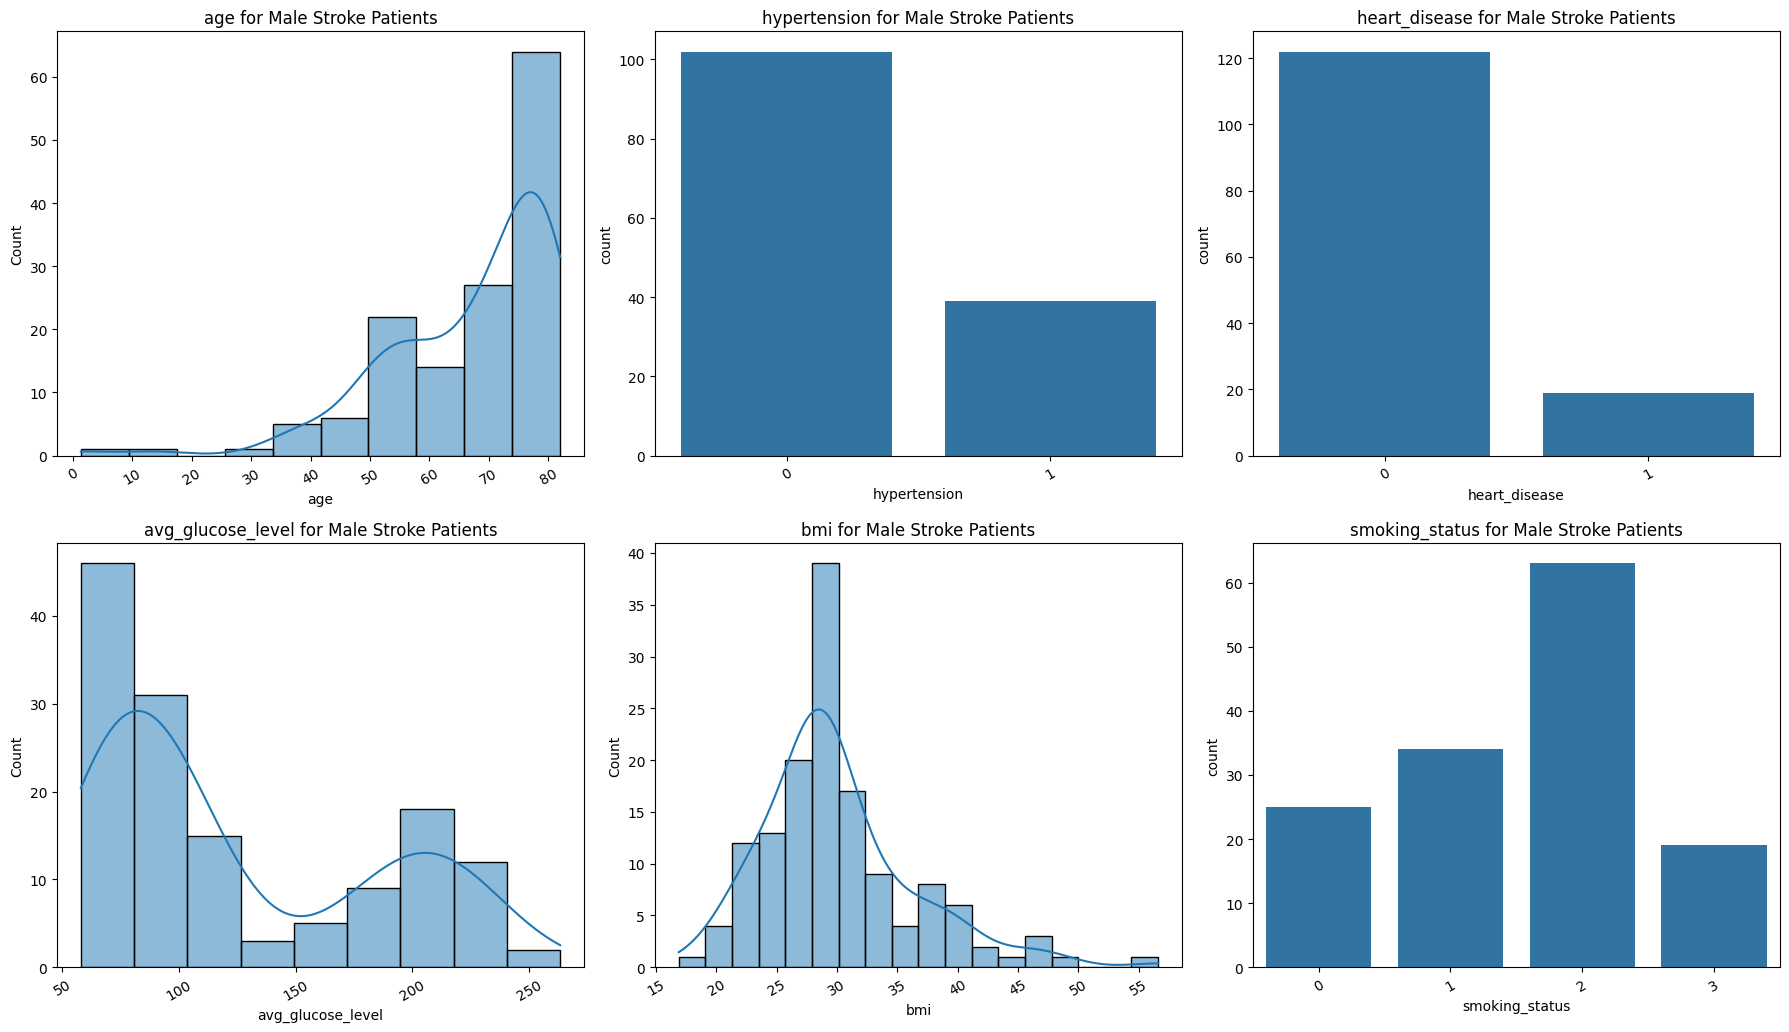

In [30]:
male_stroke = data[(data['gender'] == 0) & (data['stroke'] == 1)]

features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']

plt.figure(figsize=(18, 15))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    if data[col].dtype == 'object' or len(data[col].unique()) <= 10:
        sns.countplot(data=male_stroke, x=col)
    else:
        sns.histplot(data=male_stroke, x=col, kde=True)
    plt.title(f'{col} for Male Stroke Patients')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


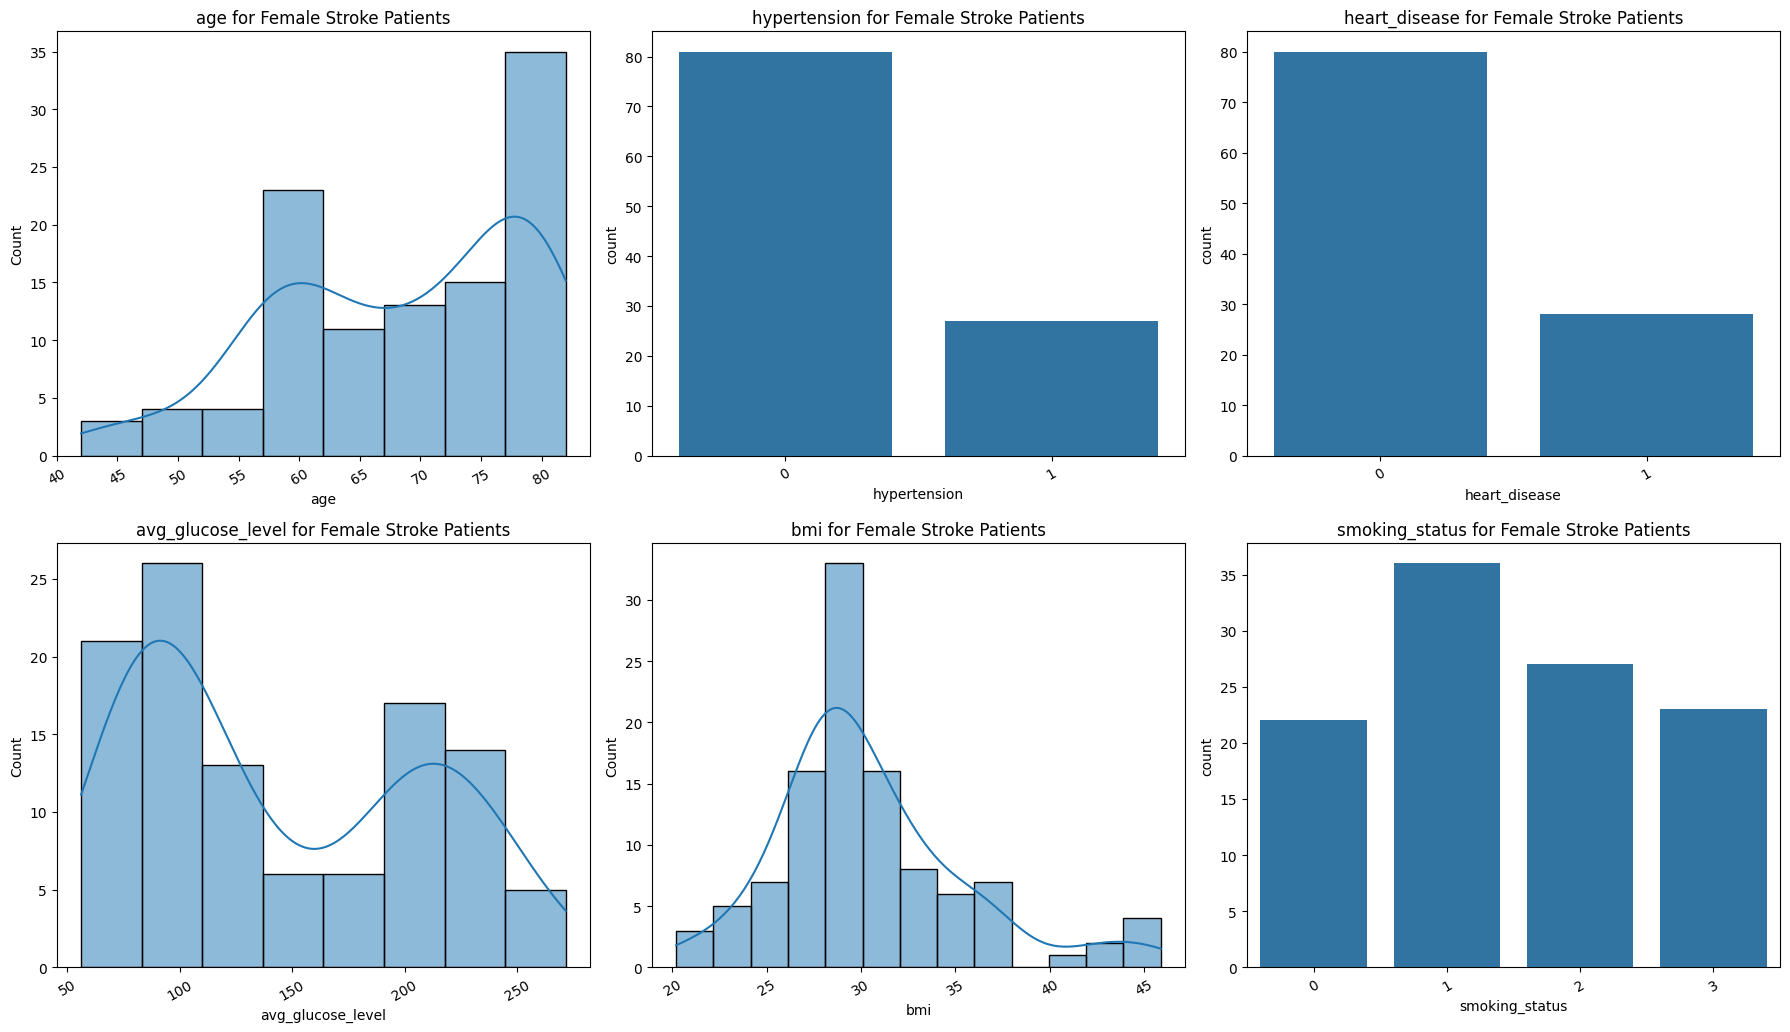

In [31]:
female_stroke = data[(data['gender'] == 1) & (data['stroke'] == 1)]

features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']

plt.figure(figsize=(18, 15))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    if data[col].dtype == 'object' or len(data[col].unique()) <= 10:
        sns.countplot(data=female_stroke, x=col)
    else:
        sns.histplot(data=female_stroke, x=col, kde=True)
    plt.title(f'{col} for Female Stroke Patients')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


In [8]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [9]:
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [10]:
data['bmi'].value_counts()

,count
bmi,
28.7,41
28.4,38
27.7,37
27.6,37
26.7,37
...,...
47.9,1
13.0,1
13.9,1


In [11]:
data['bmi'].fillna(data['bmi'].mode()[0],inplace=True)

/tmp/ipython-input-11-4055932655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mode()[0],inplace=True)


In [12]:
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [13]:
X=data.iloc[:,0:10].values
y=data.iloc[:,-1].values

In [14]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  2.70637544,
         1.00220956, -0.35178071],
       [-0.840344  ,  0.78607007, -0.32860186, ...,  2.12155854,
        -0.02411685,  0.58155233],
       [ 1.18807255,  1.62639008, -0.32860186, ..., -0.0050283 ,
         0.46955914,  0.58155233],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ..., -0.51144264,
         0.22272115,  0.58155233],
       [ 1.18807255,  0.34379639, -0.32860186, ...,  1.32825706,
        -0.42685253, -0.35178071],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.46086746,
        -0.34890369, -1.28511375]])

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

>  **Model Initialization**  
> Three classification models were initialized to predict stroke cases:
>
> - `KNeighborsClassifier(n_neighbors=9)`: The KNN model uses 9 nearest neighbors for classification. Choosing an odd value helps avoid ties, and the value of 9 is based on experimentation or domain knowledge.
>
> - `SVC(class_weight='balanced')`: The Support Vector Classifier is initialized with `class_weight='balanced'` to handle the class imbalance. This automatically adjusts weights inversely proportional to class frequencies, giving more importance to the minority class (stroke cases).
>
> - `GaussianNB()`: The Gaussian Naive Bayes model assumes that features follow a Gaussian (normal) distribution. It is simple, fast, and effective, especially for high-dimensional datasets or when features are independent.


KNeighborsClassifier(n_neighbors=9)
93.9334637964775
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

[[960   0]
 [ 62   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC(class_weight='balanced')
76.1252446183953
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       960
           1       0.14      0.58      0.23        62

    accuracy                           0.76      1022
   macro avg       0.55      0.68      0.54      1022
weighted avg       0.92      0.76      0.82      1022

[[742 218]
 [ 26  36]]
GaussianNB()
86.69275929549902
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       960
           1       0.22      0.47      0.30        62

    accuracy                           0.87      1022
   macro avg       0.59      0.68      0.61      1022
weighted avg       0.92      0.87      0.89      1022

[[857 103]
 [ 33  29]]


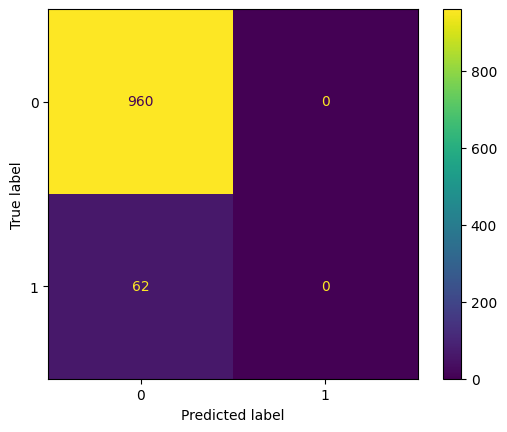

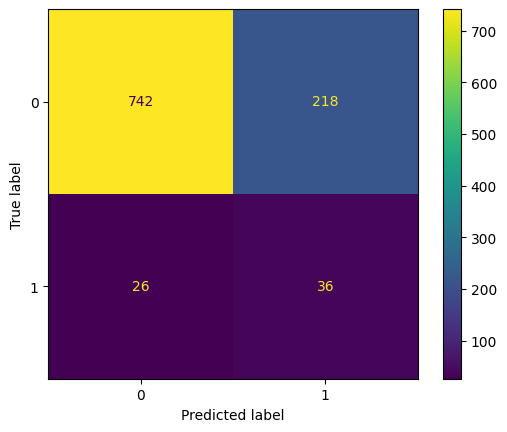

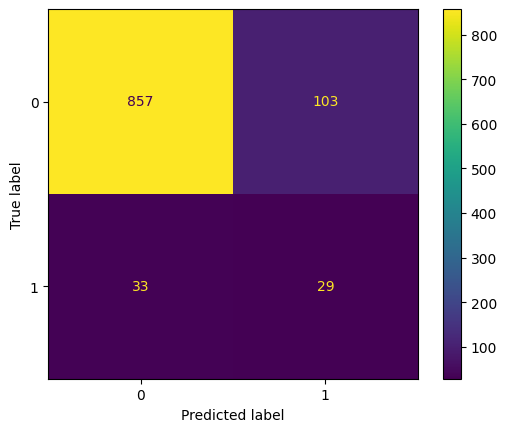

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

knn=KNeighborsClassifier(n_neighbors=9)
svm=SVC(class_weight='balanced')
gnb=GaussianNB()

model=[knn,svm,gnb]

for i in model:
  i.fit(X_train,y_train)
  y_predict=i.predict(X_test)
  print(i)
  print(accuracy_score(y_test,y_predict)*100)
  print(classification_report(y_test,y_predict))
  print(confusion_matrix(y_test,y_predict))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict))

##  Conclusion

This project compared the performance of **K-Nearest Neighbors (KNN)**, **Support Vector Machine (SVM)**, and **Gaussian Naive Bayes (GNB)** classifiers on a highly imbalanced stroke prediction dataset.

### 🔍 Model Performance Summary:

| Model      | Accuracy (%) | Recall (Class 1) | Precision (Class 1) | F1-Score (Class 1) |
|------------|---------------|------------------|----------------------|--------------------|
| KNN (k=9)  | **93.93**     | **0.00**         | 0.00                 | 0.00               |
| SVM        | 76.12         | **0.58**         | 0.14                 | 0.23               |
| GaussianNB | 86.69         | 0.47             | **0.22**             | **0.30**           |

###  Key Observations:

- **KNN achieved the highest overall accuracy (93.93%)**, but **completely failed to detect any stroke cases** (Recall = 0), making it **ineffective** for real-world stroke prediction where identifying the minority class is crucial.
  
- **SVM (with class weighting)** significantly improved recall for stroke cases (58%), but at the cost of overall accuracy and precision. However, it managed to correctly identify more actual stroke patients compared to KNN.

- **Gaussian Naive Bayes** offered a balanced performance, with **better precision and F1-score** for the minority class than SVM. While not the most accurate model overall, it provided a **better trade-off between detecting strokes and minimizing false positives**.

###  Conclusion:

Due to the **class imbalance** in the dataset, traditional accuracy is **not a reliable metric**. Instead, **recall and F1-score for the stroke class (1)** are more meaningful. Among the models:

- **KNN is not suitable** for this imbalanced problem without further modifications (like resampling).
- **SVM and GaussianNB** perform better at detecting strokes, with SVM being more sensitive (higher recall) and GNB being more precise (higher F1-score).


